# In Search Of Happiness: What If Health?

Let's continue our happiness challenge! Previously, we found out the happiest places on the planet. You can read about this and much more [here](https://nbviewer.jupyter.org/github/chupstee/data.sugar/blob/master/00002_world_happiness/world_happiness.map.ipynb).  
And now we would like to know whether the level of happiness is associated with health.  
We'll take [the same report from Kaggle](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv), which ranks 156 countries by their level of happiness on a 10-point scale.


## The World Happiness Report

Recall quoting Kaggle:

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

You can read more [here](https://www.kaggle.com/unsdsn/world-happiness).

We are most interested in the following columns:

- `Country or region` - country name
- `Overall rank` - country's place in the rating
- `Score` - happiness score


## Introduction

So, what is happiness? Or, better yet, are there any patterns in people's happiness?

[The World Factbook](https://www.cia.gov/library/publications/the-world-factbook) by CIA provides information on the history, people and society, government, economy, energy, geography, communications, transportation, military, and transnational issues for 267 world entities.  
What is interesting for us in this project is to compare the level of happiness of the country and such health indicators as:

- `Obesity` - adult prevalence rate gives the percent of a country's population considered to be obese.
- `Maternal mortality rate` (`MMR`) - the annual number of female deaths per 100,000 live births from any cause related to or aggravated by pregnancy or its management (excluding accidental or incidental causes).
- `Infant mortality rate` - the number of deaths of infants under one year old in a given year per 1,000 live births in the same year. This rate is often used as an indicator of the level of health in a country.
- `Total fertility rate` (`TFR`) - the average number of children that would be born per woman if all women lived to the end of their childbearing years and bore children according to a given fertility rate at each age. TFR is a more direct measure of the level of fertility than the crude birth rate, since it refers to births per woman.
- `HIV/AIDS - adult prevalence rate` - an estimate of the percentage of adults (aged 15-49) living with HIV/AIDS. The adult prevalence rate is calculated by dividing the estimated number of adults living with HIV/AIDS at yearend by the total adult population at yearend.
- `HIV/AIDS - deaths` - the number of adults and children who died of AIDS during a given calendar year.

We will compare the happiness scores with the CIA rates for 2016, as this is the year when the data is presented in the most complete way.  

In the search for an answer to the question ***what*** *is happiness?*, let's try to establish *the relationship between happiness and health indicators*.


## Reading The Data

In [1]:
# Import libs
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Happiness Reports

As we mentioned above, we'll read the happiness report, published in 2016.  
We'll also rename the columns according to the snake_case format.

In [2]:
# Set the width to display
pd.set_option('display.width', 120)
# Increase the number of rows to display
pd.set_option('display.max_rows', 60) 

# Get the data
happiness = pd.read_csv('data/happiness_2016.csv')

# Column map to rename
cols_dict = {'Country':'country',
             'Country or region':'country',
             'Region':'region',
             'Happiness Rank':'rank',
             'Happiness.Rank':'rank',
             'Overall rank':'rank',
             'Happiness Score':'score',
             'Happiness.Score':'score',
             'Score':'score',
             'Economy (GDP per Capita)':'gdp_per_capita',
             'Economy..GDP.per.Capita.':'gdp_per_capita',
             'GDP per capita':'gdp_per_capita',
             'Family':'family',
             'Freedom':'freedom',
             'Freedom to make life choices':'freedom',
             'Generosity':'generosity',
             'Health (Life Expectancy)':'life_expectancy',
             'Health..Life.Expectancy.':'life_expectancy',
             'Healthy life expectancy':'life_expectancy',
             'Perceptions of corruption':'trust_corruption',
             'Trust (Government Corruption)':'trust_corruption',
             'Trust..Government.Corruption.':'trust_corruption',
             'Social support':'social_support',
             'Dystopia Residual':'dystopia_residual',
             'Dystopia.Residual':'dystopia_residual',
             'Standard Error':'standard_error',
             'Upper Confidence Interval':'whisker_high',
             'Whisker.high':'whisker_high',
             'Lower Confidence Interval':'whisker_low',
             'Whisker.low':'whisker_low'
            }

# Rename the columns
happiness.rename(columns=cols_dict, inplace=True)

print(happiness.columns) # check the new column names
happiness.head() # check the values

Index(['country', 'region', 'rank', 'score', 'whisker_low', 'whisker_high', 'gdp_per_capita', 'family',
       'life_expectancy', 'freedom', 'trust_corruption', 'generosity', 'dystopia_residual'],
      dtype='object')


,country,region,rank,score,whisker_low,whisker_high,gdp_per_capita,family,life_expectancy,freedom,trust_corruption,generosity,dystopia_residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [3]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            157 non-null    object 
 1   region             157 non-null    object 
 2   rank               157 non-null    int64  
 3   score              157 non-null    float64
 4   whisker_low        157 non-null    float64
 5   whisker_high       157 non-null    float64
 6   gdp_per_capita     157 non-null    float64
 7   family             157 non-null    float64
 8   life_expectancy    157 non-null    float64
 9   freedom            157 non-null    float64
 10  trust_corruption   157 non-null    float64
 11  generosity         157 non-null    float64
 12  dystopia_residual  157 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.1+ KB


We see 157 countries in the report of 2016. There are no missing values for the `country`, `rank`, `score` columns.

Let's check for duplicates.

In [4]:
# Duplicated
print('Duplicated: {}'.format(happiness.duplicated(subset='country').sum()))

Duplicated: 0


It's OK. Let's get the CIA data.

### CIA Reports

We have downloaded The World Factbook archive for different years and saved the data that was collected in 2016.

In [5]:
cia_files = glob('data/cia.health.*.201?.txt')
cia = pd.DataFrame()

for file in cia_files:
    c = pd.read_csv(file,
                    engine='python', sep=r'\s{3,}', header=None, names=['country_cia', file.split('.')[2]],
                    squeeze=False, skiprows=0, index_col=[0],
                    thousands=',', dtype={file.split('.')[2]:'float64'}
                   ) # read the file
    if cia.size == 0:
        cia = cia.append(c)
        print('Initialize: {}'.format(cia.shape[0])) # for the first file
    else:
        cia = cia.merge(c, on='country_cia', how='outer')
        print('Merge {}: {}'.format(file.split('.')[2], cia.shape[0]))

cia.reset_index()

cia.info()
cia

Initialize: 109
Merge hiv_aids_death: 110
Merge infant_mortality: 226
Merge mmr: 226
Merge obesity: 227
Merge tfr: 227
<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_cia       227 non-null    object 
 1   hiv_aids          109 non-null    float64
 2   hiv_aids_death    63 non-null     float64
 3   infant_mortality  225 non-null    float64
 4   mmr               184 non-null    float64
 5   obesity           192 non-null    float64
 6   tfr               224 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.2+ KB


,country_cia,hiv_aids,hiv_aids_death,infant_mortality,mmr,obesity,tfr
0,Swaziland,27.2,3900.0,50.4,389.0,16.5,2.74
1,Lesotho,25.0,9900.0,47.6,487.0,16.6,2.68
2,Botswana,21.9,3900.0,8.6,129.0,18.9,2.30
3,South Africa,18.9,110000.0,32.0,138.0,28.3,2.31
4,Namibia,13.8,4300.0,36.4,265.0,17.2,3.36
...,...,...,...,...,...,...,...
222,Singapore,NaN,NaN,2.4,10.0,6.1,0.82
223,Iceland,NaN,NaN,2.1,3.0,21.9,2.01
224,Japan,NaN,NaN,2.0,5.0,4.3,1.41
225,Monaco,NaN,NaN,1.8,NaN,NaN,1.53


## Preparing The Data Sets

Now we should combine the `happiness` and `cia` datasets.

First, we need to check the columns that will be used for merging.
Country names may differ in data sets, for instance, `eSwatini` and `Swaziland`, `Trinidad and Tobago` and `Trinidad & Tobago`. In this case, the rows will not match.

Before, we store the `country_cia` column of the `cia` in a new column `country`.

In [6]:
cia['country'] = cia['country_cia']

Let's compare the `country` columns of the `happiness` data set and the `cia` data set.
To do this, we'll combine two data sets using `outer` join.

In [7]:
happiness_cia = happiness.merge(cia, on='country', how='outer')[['country', 'score', 'infant_mortality']]

pd.set_option('display.max_rows', 100) # increase the number of rows to display
happiness_cia[happiness_cia.isnull().any(axis=1)].sort_values(by=['score', 'country']) # the countries don't match

,country,score,infant_mortality
138,Ivory Coast,3.916,NaN
126,Congo (Brazzaville),4.236,NaN
124,Congo (Kinshasa),4.272,NaN
118,Myanmar,4.395,NaN
107,Palestinian Territories,4.754,NaN
96,Somaliland Region,5.057,NaN
87,Montenegro,5.161,NaN
76,Kosovo,5.401,NaN
61,North Cyprus,5.771,NaN
57,South Korea,5.835,NaN


To provide the same country names:

- Create a dictionary mapping all names to the values in the `happiness` dataset since we explore the happiness data.
- Rename the countries in the `cia` dataset by replacing the values according to the map dictionary.

In [8]:
# Countries map to rename
country_to_rename = {'Cote d\'Ivoire':'Ivory Coast',
                     'Congo, Republic of the':'Congo (Brazzaville)',
                     'Congo, Democratic Republic of the':'Congo (Kinshasa)',
                     'Burma':'Myanmar',
                     'Korea, South':'South Korea',
                     'Czechia':'Czech Republic'
                    }
# Rename the countries
cia['country'].replace(country_to_rename, inplace=True)

cia.sample(5, random_state=5) # check the values randomly

,country_cia,hiv_aids,hiv_aids_death,infant_mortality,mmr,obesity,tfr,country
172,Puerto Rico,NaN,NaN,7.4,14.0,NaN,1.64,Puerto Rico
214,Luxembourg,NaN,NaN,3.4,10.0,22.6,1.61,Luxembourg
46,Papua New Guinea,0.9,1100.0,37.4,215.0,21.3,3.10,Papua New Guinea
168,Nauru,NaN,NaN,7.9,NaN,61.0,2.84,Nauru
21,Cote d'Ivoire,2.7,25000.0,57.2,645.0,10.3,3.46,Ivory Coast


We can now use the `country` column to merge the two datasets.

In [9]:
happiness_cia = happiness.merge(cia, on='country', how='left').copy()

happiness_cia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            157 non-null    object 
 1   region             157 non-null    object 
 2   rank               157 non-null    int64  
 3   score              157 non-null    float64
 4   whisker_low        157 non-null    float64
 5   whisker_high       157 non-null    float64
 6   gdp_per_capita     157 non-null    float64
 7   family             157 non-null    float64
 8   life_expectancy    157 non-null    float64
 9   freedom            157 non-null    float64
 10  trust_corruption   157 non-null    float64
 11  generosity         157 non-null    float64
 12  dystopia_residual  157 non-null    float64
 13  country_cia        153 non-null    object 
 14  hiv_aids           93 non-null     float64
 15  hiv_aids_death     56 non-null     float64
 16  infant_mortality   152 non

Let's build a correlation matrix by columns.

In [10]:
# Select the columns of interest
cols_corr = ['country', 'region', 'score',
             'obesity', 'tfr',
             'mmr', 'infant_mortality',
             'hiv_aids', 'hiv_aids_death'
            ]
happiness_cia = happiness_cia[cols_corr]
happiness_cia

,country,region,score,obesity,tfr,mmr,infant_mortality,hiv_aids,hiv_aids_death
0,Denmark,Western Europe,7.526,19.7,1.73,6.0,4.0,NaN,NaN
1,Switzerland,Western Europe,7.509,19.5,1.55,5.0,3.6,NaN,NaN
2,Iceland,Western Europe,7.501,21.9,2.01,3.0,2.1,NaN,NaN
3,Norway,Western Europe,7.498,23.1,1.86,5.0,2.5,NaN,NaN
4,Finland,Western Europe,7.413,22.2,1.75,3.0,2.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,3.484,9.6,4.86,405.0,54.2,1.0,2400.0
153,Afghanistan,Southern Asia,3.360,5.5,5.22,396.0,112.8,NaN,NaN
154,Togo,Sub-Saharan Africa,3.303,8.4,4.43,368.0,43.7,2.1,5100.0
155,Syria,Middle East and Northern Africa,3.069,27.8,2.55,68.0,15.2,NaN,NaN


In [11]:
# Get correlation matrix
happiness_cia_corr = happiness_cia.corr()
happiness_cia_corr

,score,obesity,tfr,mmr,infant_mortality,hiv_aids,hiv_aids_death
score,1.000000,0.558845,-0.649370,-0.615258,-0.703726,-0.303608,-0.017830
obesity,0.558845,1.000000,-0.540814,-0.589450,-0.638373,-0.068440,-0.021306
tfr,-0.649370,-0.540814,1.000000,0.822510,0.882613,0.215809,0.053922
mmr,-0.615258,-0.589450,0.822510,1.000000,0.836917,0.164997,0.141207
infant_mortality,-0.703726,-0.638373,0.882613,0.836917,1.000000,0.106235,0.074404
hiv_aids,-0.303608,-0.068440,0.215809,0.164997,0.106235,1.000000,0.314998
hiv_aids_death,-0.017830,-0.021306,0.053922,0.141207,0.074404,0.314998,1.000000


It seems, there are explicitely relationships between some parameters. We'll look at them further.  
Let's continue with the plots.

## Correlation Map

We'll plot the correlation matrix below, but first, we'll prepare the data to make the plot easier to read.

In [12]:
# A triangular mask to avoid repeated values
happiness_cia_corr = happiness_cia_corr.iloc[1:, :-1]
mask = np.triu(np.ones_like(happiness_cia_corr), k=1)

# Readable names for the plot
cols_dict = {'score':'Happiness',
             'hiv_aids':'HIV/AIDS',
             'hiv_aids_death':'HIV/AIDS\ndeath',
             'infant_mortality':'Infant\nmortality',
             'mmr':'Maternal\nmortality',
             'tfr':'Total\nfertility',
             'obesity':'Obesity'
            }
# Rename columns in the correlation matrix
happiness_cia_corr.rename(columns=cols_dict, index=cols_dict, inplace=True)

In [13]:
%matplotlib inline

# Turn on svg rendering
%config InlineBackend.figure_format = 'svg'

# Color palette for the blog
snark_palette = ['#e0675a', # red
                 '#5ca0af', # green
                 '#edde7e', # yellow
                 '#211c47' # dark blue
                ]

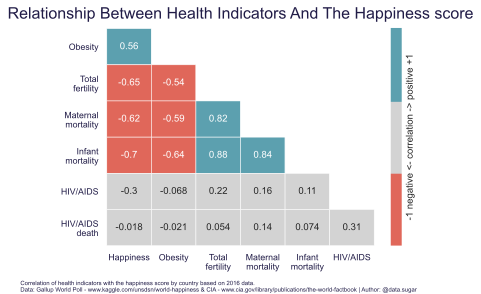

In [14]:
# Color palette for the data
palette = [snark_palette[0], # red
           'lightgrey',
           snark_palette[1] # green
          ]

# Inscriptions
title = """Relationship Between Health Indicators And The Happiness score"""
description = """
Сorrelation of health indicators with the happiness score by country based on 2016 data.
Data: Gallup World Poll - www.kaggle.com/unsdsn/world-happiness & CIA - www.cia.gov/library/publications/the-world-factbook | Author: @data.sugar
"""

# Plot size
figsize = (6,4)

# Set the figure
sns.set(context='paper', style='ticks', palette=palette,
        rc={'xtick.bottom':False, 'ytick.left':False, 
            'axes.spines.left': False, 'axes.spines.bottom': False,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
sns.heatmap(happiness_cia_corr, mask=mask, cmap=palette,
            vmin=-1, vmax=1, center=0,
            square=False, linewidths=.5, annot=True, fmt='.2g',
            cbar_kws={'shrink': 1, 'ticks':[], 'label':'-1 negative <- correlation -> positive +1'},
            ax=ax)

# Set some aesthetic params for the plot
ax.set_title(title, fontdict={'fontsize': 16}, loc='center', pad=10, c=snark_palette[-1]) # set a title of the plot
ax.annotate(description, xy=(20, -4), size=6, xycoords='figure points', c=snark_palette[-1])
ax.tick_params(axis='both', colors=snark_palette[-1]) # set x/y ticks

# Save and plot
plt.savefig('plot.pic/plot.happiness.health.png', dpi=150, bbox_inches='tight')
plt.show()

We expected some correlation between the HIV/AIDS rates and the happiness score, but there is no such correlation.  
Indeed, the higher the level of obesity, the higher the happiness index, but this relationship is not very strict.  
Let's plot these correlations.

## Obesity And Happiness

<Figure size 432x288 with 0 Axes>

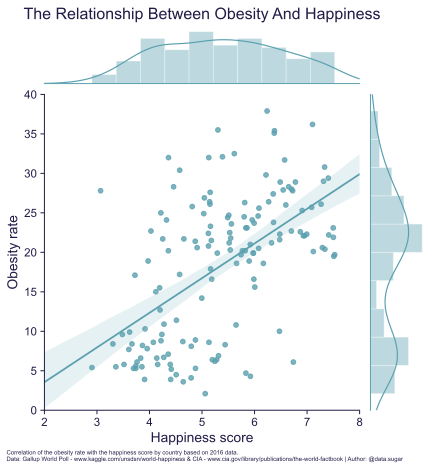

In [15]:
# Inscriptions
title = """The Relationship Between Obesity And Happiness"""
description = """
Correlation of the obesity rate with the happiness score by country based on 2016 data.
Data: Gallup World Poll - www.kaggle.com/unsdsn/world-happiness & CIA - www.cia.gov/library/publications/the-world-factbook | Author: @data.sugar
"""

# Plot size
figsize = (6,4)

# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.major.size':4,
            'axes.spines.left': False, 'axes.spines.bottom': False,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
fig = plt.figure(figsize=figsize, facecolor='w')
g = sns.jointplot(x='score', y='obesity', data=happiness_cia,
                  kind='reg', truncate=False, dropna=True,
                  xlim=(2, 8), ylim=(0, 40),
                  marginal_kws=dict(hist=True, bins=10),
                  color=snark_palette[1]
                 )

# Set some aesthetic params for the plot
g.ax_marg_x.set_title(title, fontdict={'fontsize': 16}, loc='center', pad=10, c=snark_palette[-1]) # set a title of the plot
g.ax_marg_x.annotate(description, xy=(0.015, -0.01), size=6, xycoords='figure fraction', c=snark_palette[-1])
g.ax_joint.set_xlabel('Happiness score', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
g.ax_joint.set_ylabel('Obesity rate', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
g.ax_joint.tick_params(axis='both', labelsize='large', colors=snark_palette[-1]) # set x/y ticks
g.ax_joint.spines['bottom'].set_color(snark_palette[-1]) # color x axis
g.ax_joint.spines['left'].set_color(snark_palette[-1]) # color y axis
g.ax_marg_x.tick_params(axis='x', bottom=False) # disable x margin ticks
g.ax_marg_x.spines['bottom'].set_color(snark_palette[1])
g.ax_marg_y.tick_params(axis='y', left=False) # disable y margin ticks
g.ax_marg_y.spines['left'].set_color(snark_palette[1])

# Save and plot
plt.savefig('plot.pic/plot.happiness.health.obesity.png', dpi=150, bbox_inches='tight')
plt.show()

## Total Fertility Rate And Happiness Score

<Figure size 432x288 with 0 Axes>

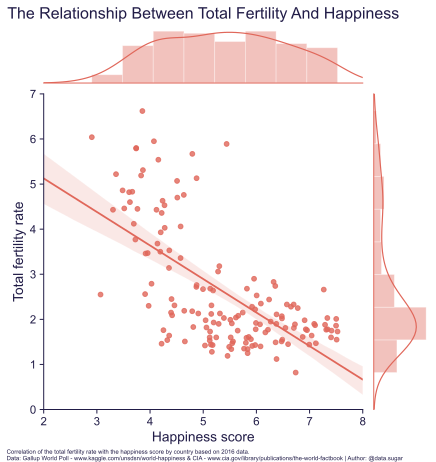

In [16]:
# Inscriptions
title = """The Relationship Between Total Fertility And Happiness"""
description = """
Correlation of the total fertility rate with the happiness score by country based on 2016 data.
Data: Gallup World Poll - www.kaggle.com/unsdsn/world-happiness & CIA - www.cia.gov/library/publications/the-world-factbook | Author: @data.sugar
"""

# Plot size
figsize = (6,4)

# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.major.size':4,
            'axes.spines.left': False, 'axes.spines.bottom': False,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
fig = plt.figure(figsize=figsize, facecolor='w')
g = sns.jointplot(x='score', y='tfr', data=happiness_cia,
                  kind='reg', truncate=False, dropna=True,
                  xlim=(2, 8), ylim=(0, 7),
                  marginal_kws=dict(hist=True, bins=8),
                  color=snark_palette[0]
                 )

# Set some aesthetic params for the plot
g.ax_marg_x.set_title(title, fontdict={'fontsize': 16}, loc='center', pad=10, c=snark_palette[-1]) # set a title of the plot
g.ax_marg_x.annotate(description, xy=(0.015, -0.01), size=6, xycoords='figure fraction', c=snark_palette[-1])
g.ax_joint.set_xlabel('Happiness score', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
g.ax_joint.set_ylabel('Total fertility rate', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
g.ax_joint.tick_params(axis='both', labelsize='large', colors=snark_palette[-1]) # set x/y ticks
g.ax_joint.spines['bottom'].set_color(snark_palette[-1]) # color x axis
g.ax_joint.spines['left'].set_color(snark_palette[-1]) # color y axis
g.ax_marg_x.tick_params(axis='x', bottom=False) # disable x margin ticks
g.ax_marg_x.spines['bottom'].set_color(snark_palette[0])
g.ax_marg_y.tick_params(axis='y', left=False) # disable y margin ticks
g.ax_marg_y.spines['left'].set_color(snark_palette[0])

# Save and plot
plt.savefig('plot.pic/plot.happiness.health.tfr.png', dpi=150, bbox_inches='tight')
plt.show()

## Infant Mortality Rate And Happiness Score

<Figure size 432x288 with 0 Axes>

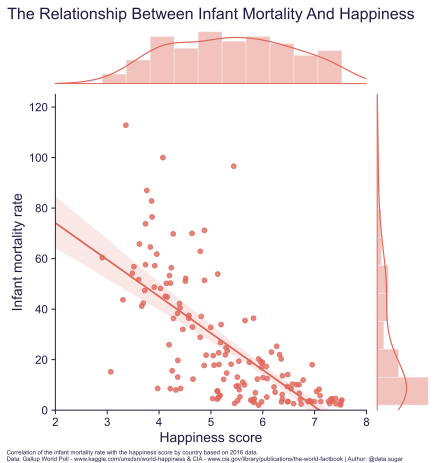

In [17]:
# Inscriptions
title = """The Relationship Between Infant Mortality And Happiness"""
description = """
Correlation of the infant mortality rate with the happiness score by country based on 2016 data.
Data: Gallup World Poll - www.kaggle.com/unsdsn/world-happiness & CIA - www.cia.gov/library/publications/the-world-factbook | Author: @data.sugar
"""

# Plot size
figsize = (6,4)

# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.major.size':4,
            'axes.spines.left': False, 'axes.spines.bottom': False,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
fig = plt.figure(figsize=figsize, facecolor='w')
g = sns.jointplot(x='score', y='infant_mortality', data=happiness_cia,
                  kind='reg', truncate=False, dropna=True,
                  xlim=(2, 8), ylim=(0, 125),
                  marginal_kws=dict(hist=True, bins=10),
                  color=snark_palette[0]
                 )

# Set some aesthetic params for the plot
g.ax_marg_x.set_title(title, fontdict={'fontsize': 16}, loc='center', pad=10, c=snark_palette[-1]) # set a title of the plot
g.ax_marg_x.annotate(description, xy=(0.015, -0.01), size=6, xycoords='figure fraction', c=snark_palette[-1])
g.ax_joint.set_xlabel('Happiness score', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
g.ax_joint.set_ylabel('Infant mortality rate', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
g.ax_joint.tick_params(axis='both', labelsize='large', colors=snark_palette[-1]) # set x/y ticks
g.ax_joint.spines['bottom'].set_color(snark_palette[-1]) # color x axis
g.ax_joint.spines['left'].set_color(snark_palette[-1]) # color y axis
g.ax_marg_x.tick_params(axis='x', bottom=False) # disable x margin ticks
g.ax_marg_x.spines['bottom'].set_color(snark_palette[0])
g.ax_marg_y.tick_params(axis='y', left=False) # disable y margin ticks
g.ax_marg_y.spines['left'].set_color(snark_palette[0])

# Save and plot
plt.savefig('plot.pic/plot.happiness.health.infant_mortality.png', dpi=150, bbox_inches='tight')
plt.show()

## Total Fertility Rate And Obesity Rate

<Figure size 432x288 with 0 Axes>

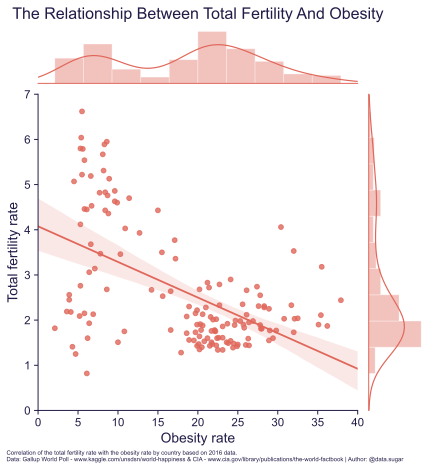

In [18]:
# Inscriptions
title = """The Relationship Between Total Fertility And Obesity"""
description = """
Correlation of the total fertility rate with the obesity rate by country based on 2016 data.
Data: Gallup World Poll - www.kaggle.com/unsdsn/world-happiness & CIA - www.cia.gov/library/publications/the-world-factbook | Author: @data.sugar
"""

# Plot size
figsize = (6,4)

# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'xtick.major.size': 4, 'ytick.major.size':4,
            'axes.spines.left': False, 'axes.spines.bottom': False,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
fig = plt.figure(figsize=figsize, facecolor='w')
g = sns.jointplot(x='obesity', y='tfr', data=happiness_cia,
                  kind='reg', truncate=False, dropna=True,
                  xlim=(0, 40), ylim=(0, 7),
                  marginal_kws=dict(hist=True, bins=10),
                  color=snark_palette[0]
                 )

# Set some aesthetic params for the plot
g.ax_marg_x.set_title(title, fontdict={'fontsize': 16}, loc='center', pad=10, c=snark_palette[-1]) # set a title of the plot
g.ax_marg_x.annotate(description, xy=(0.015, -0.01), size=6, xycoords='figure fraction', c=snark_palette[-1])
g.ax_joint.set_xlabel('Obesity rate', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
g.ax_joint.set_ylabel('Total fertility rate', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
g.ax_joint.tick_params(axis='both', labelsize='large', colors=snark_palette[-1]) # set x/y ticks
g.ax_joint.spines['bottom'].set_color(snark_palette[-1]) # color x axis
g.ax_joint.spines['left'].set_color(snark_palette[-1]) # color y axis
g.ax_marg_x.tick_params(axis='x', bottom=False) # disable x margin ticks
g.ax_marg_x.spines['bottom'].set_color(snark_palette[0])
g.ax_marg_y.tick_params(axis='y', left=False) # disable y margin ticks
g.ax_marg_y.spines['left'].set_color(snark_palette[0])

# Save and plot
plt.savefig('plot.pic/plot.happiness.health.tfr_obesity.png', dpi=150, bbox_inches='tight')
plt.show()

## Conclusions

As we mentioned above, there is no significant correlation between the HIV/AIDS rates and the happiness score.

And these correlations are quite high (above 0.8):

- total fertility rate and infant mortality rate;
- maternal mortality rate and infant mortality rate;
- maternal mortality rate and total fertility rate.

And it seems natural. If the birth rate per woman is higher, the risk of maternal and infant mortality is higher, given the fact that total fertility, maternal mortality, and infant mortality are inversely proportional to the level of happiness.  In other words, the birth rate, maternal and infant mortality are higher in the least happy countries.  

Statistics do not give the root cause: people are happy, and therefore infant mortality is lower, or mortality is lower, and therefore people are happier (because they are generally healthier). Which came first - the chicken or the egg.  

There is a low negative correlation between the total fertility rate and the obesity rate.  
What does it mean? Does this mean that satisfied people don't want to think about procreation?

What about happiness? 
The higher a country is on the happiness stairs, the higher the obesity rate, but the lower the total fertility, as well as maternal and infant mortality.


# Blog Post

In [19]:
blog_post = r"""
## IN SEARCH OF 🎈HAPPINESS: 🩺WHAT if HEALTH?  


💪We continue our happiness #challenge!  

👀And now we wonder whether high \#health indicators contribute to \#happiness.
To compare health indicators with happiness score, we'll take the World Happiness Report from \#Kaggle, which ranks 156 countries for happiness on a 10-point scale, and use \#CIA data from The World Factbook.

📌Today we would like to know how health makes us happy!  

✔The correlation map we built says that the more food, the more happiness (see the relationship between obesity and happiness).  
Oh, we already knew that, a hungry man is an angry man.

✔Surprisingly, there is no correlation between HIV/AIDS rates and the level of happiness we expected.

✔There is a low negative correlation between the total fertility rate and the obesity rate.
What does it mean? Does this mean that satisfied people don't want to think about procreation?

✔If the birth rate per woman is higher, the risk of maternal and infant mortality is higher, given the fact that total fertility, maternal mortality and infant mortality are inversely proportional to the level of happiness.  
In other words, the birth rate, maternal and infant mortality are higher in the least happy countries.

Statistics don't give the root cause: people are happy, and therefore infant mortality is lower, or mortality is lower, and therefore people are happier (because they are generally healthier).  
Which came first - the chicken or the egg.

💭What about happiness?  
The higher a country is on the happiness stairs, the higher the obesity rate, but the lower the total fertility, as well as maternal and infant mortality.

#tobecontinued

(Interested in more details? Follow the link in bio for the entire research project!)  
.  
.  
.  
\#funtime \#probably \#datascience \#datapower \#data_sugar_happiness \#happy
\#data_know_everything_and_nothing \#linkinbio \#datajournalism \#python
"""

# Check post text length for Instagram
len(blog_post)

1935

In [20]:
from IPython.display import Markdown as md
md(blog_post)


## IN SEARCH OF 🎈HAPPINESS: 🩺WHAT if HEALTH?  


💪We continue our happiness #challenge!  

👀And now we wonder whether high \#health indicators contribute to \#happiness.
To compare health indicators with happiness score, we'll take the World Happiness Report from \#Kaggle, which ranks 156 countries for happiness on a 10-point scale, and use \#CIA data from The World Factbook.

📌Today we would like to know how health makes us happy!  

✔The correlation map we built says that the more food, the more happiness (see the relationship between obesity and happiness).  
Oh, we already knew that, a hungry man is an angry man.

✔Surprisingly, there is no correlation between HIV/AIDS rates and the level of happiness we expected.

✔There is a low negative correlation between the total fertility rate and the obesity rate.
What does it mean? Does this mean that satisfied people don't want to think about procreation?

✔If the birth rate per woman is higher, the risk of maternal and infant mortality is higher, given the fact that total fertility, maternal mortality and infant mortality are inversely proportional to the level of happiness.  
In other words, the birth rate, maternal and infant mortality are higher in the least happy countries.

Statistics don't give the root cause: people are happy, and therefore infant mortality is lower, or mortality is lower, and therefore people are happier (because they are generally healthier).  
Which came first - the chicken or the egg.

💭What about happiness?  
The higher a country is on the happiness stairs, the higher the obesity rate, but the lower the total fertility, as well as maternal and infant mortality.

#tobecontinued

(Interested in more details? Follow the link in bio for the entire research project!)  
.  
.  
.  
\#funtime \#probably \#datascience \#datapower \#data_sugar_happiness \#happy
\#data_know_everything_and_nothing \#linkinbio \#datajournalism \#python
